In [1]:
%python
import pyspark

file_location_1 = "/FileStore/tables/employees.txt"
file_location_2 = "/FileStore/tables/projects.txt"
file_type = "csv"

infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

df_employees = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location_1)

df_projects = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location_2)
display(df_employees)



employee_id,name,role,hours
11,Nihit,Data engineer,20
22,Sailaja,Data engineer,20
33,Angelique,Data engineer,20
44,Joe,Data engineer,20
55,Tejo,Data engineer,20
1,Rajesh,Manager,40
2,Prashant,Team lead,40
3,Whitney,Data engineer,40


In [2]:
df_employees.show()

+------------+---------+-------------+-----+
employee_id | name | role |hours|
+------------+---------+-------------+-----+
 11| Nihit|Data engineer| 20|
 22| Sailaja|Data engineer| 20|
 33|Angelique|Data engineer| 20|
 44| Joe|Data engineer| 20|
 55| Tejo|Data engineer| 20|
 1| Rajesh| Manager| 40|
 2| Prashant| Team lead| 40|
 3| Whitney|Data engineer| 40|
+------------+---------+-------------+-----+

In [3]:
display(df_projects)

employee_id,project_id,project_name
11,100,ML
1,200,AI
22,300,DS
3,400,CS
4,500,PBI
33,600,Tableu
2,700,VR
44,800,AR


In [4]:
df_projects.select("employee_id","project_name").show()


+-----------+------------+
employee_id|project_name|
+-----------+------------+
 11| ML|
 1| AI|
 22| DS|
 3| CS|
 4| PBI|
 33| Tableu|
 2| VR|
 44| AR|
+-----------+------------+

In [5]:
df= df_employees.groupby("hours")\
.count()
display(df)

hours,count
40,3
20,5


In [6]:
df_employees.registerTempTable("yash_employees")

display(sqlContext.sql("select * from yash_employees a where hours=40"))

employee_id,name,role,hours
1,Rajesh,Manager,40
2,Prashant,Team lead,40
3,Whitney,Data engineer,40


In [7]:

df_projects.registerTempTable("yash_projects")

#sqlContext.sql("select * from yash_projects a where employee_id=11").show()
display(sqlContext.sql("select * from yash_projects a where employee_id=11"))

#sqlContext.sql("select b.employee_id, a.employee_id , a.hours, a.name , b.project_id, b.project_name, a.role from yash_employees as a  INNER JOIN yash_projects b on a.employee_id==b.employee_id where a.hours=40" ).show()

#inner_join = yash_employees.join(yash_projects, yash_employees.employee_id == yash_projects.employee_id)
#inner_join.show()
               
               
               #LEFT JOIN yash_projects b on a.employee_id=b.employee_id").show()
      
      
     # """SELECT columns FROM temptbl1 AS a INNER JOIN temptbl2 AS b ON a.column = b.column"""



#yash_employees.join(yash_projects, yash_employees["employee_id"] == yash_projects["employee_id"], "left_outer")

#df = df_employees.join(df_projects, on=['employee_id'], how='left')
#df.show()
#display(df_projects)
#df_projects.join(df_employees,['employee_id']).show()
#df= df_employees.select(df['hours'])
#df.show()
#display(df_employef1.join(df2, df1.id == df2.id).select('df1.*')es)
#df_employees.show()
#display(df_projects)
#df_employees.join(df_projects, df_employees.employee_id == df_projects.employee_id).select('df_employees.*')
#unioned_df = unionAll([df_projects, df_employees])
#unioned_df.show() 

employee_id,project_id,project_name
11,100,ML


In [8]:
import matplotlib.pyplot as plt
file_location = "/FileStore/tables/superstore.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
#ax = plt.gca()
#df.plot(kind='bar', x='Category', y='Sales', color='blue',ax=ax)

#df.plot(kind='bar', x='Category', y='Profit', color='red',ax=ax).show()
#df=df.astype(float)
#df.plot.scatter(x='Sales',y='Profit')
#df.plot(kind='bar', x='City', y='Sales', color='blue')

df = df.toPandas() 
display(df.head())

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0,219.582
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [9]:
#df.printSchema()
df.columns
#df.info()

Out[32]: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
 dtype='object')

In [10]:
df_employees.select('hours').distinct().show()
#display(df_employees.select('hours').distinct())

+-----+
hours|
+-----+
 40|
 20|
+-----+

In [11]:
df_region=df['Region'].unique()
print(df_region)

['South' 'West' 'Central' 'East']

In [12]:
subset=df[['Ship Mode','Sales','Profit','Region','Quantity','Discount','City']]
groupbyall=subset.groupby(['Ship Mode','Region'])[['Sales','Discount','Profit']].sum()
groupbyshipment=subset.groupby('Ship Mode')['Profit'].sum()
print(groupbyshipment.to_frame())
  

Profit
Ship Mode 
First Class 123.4737-147.96319.77148.206252.1415.5527.0986...
Same Day 10.440.147229.3412271.4192-50.098-3.4625.2626-...
Second Class 41.9136219.5826.87149.992.482416.0117.384-1.01...
Standard Class -383.0312.516414.16941.965690.71525.782534.478...

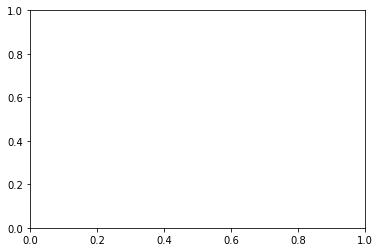

In [13]:
# databricks does not support plt
ax = plt.gca()
df.plot(kind='bar', x='Ship Mode', y='Sales', color='blue',ax=ax)
df.plot(kind='bar', x='Ship Mode', y='Profit', color='red',ax=ax)
plt.show()